Importing the necessary libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [22]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize']= (10,8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [23]:
from urllib.request import urlretrieve as urt

Obtaining the data to be analysed

In [24]:
#medical_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
#urt(medical_url,'medical_records.csv')

#### 1. Data loading

In [25]:
medical_df = pd.read_csv('medical_records.csv')

In [26]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
medical_df.sample(5)

,age,sex,bmi,children,smoker,region,charges
2,28,male,33.00,3,no,southeast,4449.4620
1209,59,male,37.10,1,no,southwest,12347.1720
1004,47,male,19.19,1,no,northeast,8627.5411
1225,33,female,39.82,1,no,southeast,4795.6568
791,19,male,27.60,0,no,southwest,1252.4070


There are no null values in any column and the datatypes are correct for each column.

We may thus proceed to anomaly detection of data in any of the columns

In [28]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The charges column has a very high standard deviation which shows a hiuge variation  unlike the other columns.

Overall, the data looks to be free from general anomalies in any of the columns. Further investigation of outliers maybe will be carried out.

In [43]:
corr_matrix= medical_df[['age','bmi','children','charges']].corr()

<Axes: >

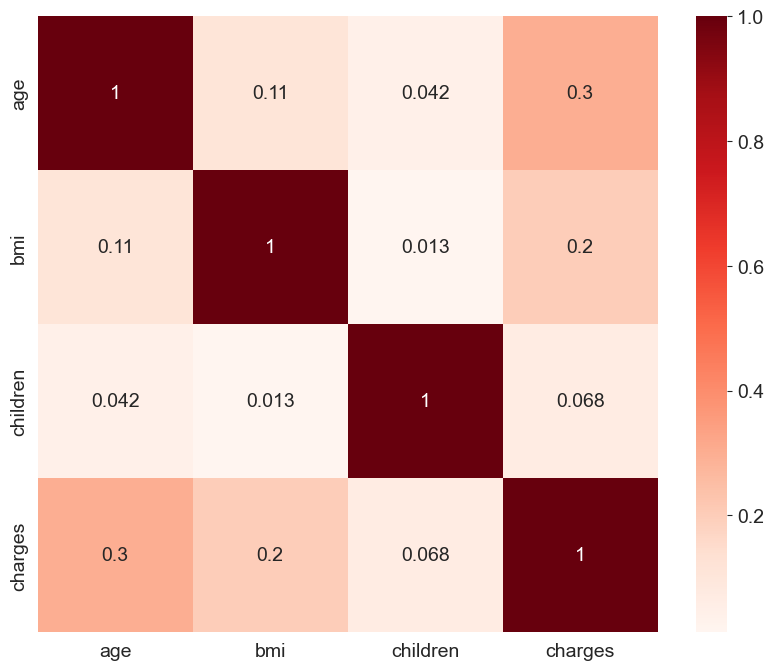

In [45]:
sns.heatmap(corr_matrix,cmap='Reds',annot=True)

Since charges is our target variable, we can observe that age and bmi have a high positive correlation with charges

#### 2. Understanding the data with visualisations

The data visualisation will be in form of:
* distributions of the different columns
* relationships between the different columns and the target column(charges)

### Distributions

In [46]:
fig = px.histogram(
    medical_df,x='age',
    marginal='box',
    title='Distribution of age',
    nbins=47,
    color_discrete_sequence = ['grey','red'],
    color='smoker'
    )

fig.update_layout(bargap = 0.1)
fig.show()

In [51]:
fig = px.histogram(
    medical_df,x='age',
    marginal='box',
    title='Distribution of age',
    nbins=47,
    color_discrete_sequence = ['grey','red'],
    color='sex'
    )

fig.update_layout(bargap = 0.1)
fig.show()

Its is observed the age follows a uniform distribution with a mean of 39 years generally except for a high number of people at the age of 18 and 19, this could be due to a number of reasons, the most probable being waiver fees for early registration or registration campaigns for new insurance signups

In [48]:
fig= px.histogram(
    medical_df,
    x='bmi',
    marginal='box',
    color_discrete_sequence =['grey','green'],
    title='Distribution of BMI',
    color='smoker',
)
fig.update_layout(bargap = 0.1)
fig.show()

In [52]:
fig= px.histogram(
    medical_df,
    x='bmi',
    marginal='box',
    color_discrete_sequence =['grey','green'],
    title='Distribution of BMI',
    color='sex',
)
fig.update_layout(bargap = 0.1)
fig.show()

We can observe the BMI follows a normal distribution with most of the people having a BMI between 26 and 35 with a median of 30.

In [49]:
fig = px.histogram(
    medical_df,
    x='children',
    color_discrete_sequence=['grey','purple'],
    title='Distribution of children',
    marginal='box',
    color='smoker',
)
fig.update_layout(bargap = 0.1)
fig.show()

In [53]:
fig = px.histogram(
    medical_df,
    x='children',
    color_discrete_sequence=['grey','purple'],
    title='Distribution of children',
    marginal='box',
    color='sex',
)
fig.update_layout(bargap = 0.1)
fig.show()

It is observed that the number of children is an exponetial curve , the number decreases exponentially from 0 children to 5 children. With the median number of children being 1 child.

The above distributions are population-specific and need to be analysed further to make sure they match the general population metrics to esure that the subsequent model is not biased and that our data is represenatitive of the general population.

In [50]:
fig = px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    color_discrete_sequence =['grey','blue'],
    title='Distribution of charges',
    color='smoker',
)
fig.update_layout(bargap = 0.1)
fig.show()

In [54]:
fig = px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    color_discrete_sequence =['grey','blue'],
    title='Distribution of charges',
    color='sex',
)
fig.update_layout(bargap = 0.1)
fig.show()

The distribution of charges of smokers and non-smokers varries alot and ought to be analysed indepedently:

* Non smokers have generally lower charges then smokers, with non smokers being charged between 3,900 to 11,300 while smokers are charged between 20,700 to 41,000

* Non smokers have more outliers in charges though, possibly due to other factors that can be investigated.

* Individually, Non smokers have a right skewed distribution , having mostly low charges

* Individually, Smokers have two peaks in the distribution , this could indicate a need to futher break down smokers into two groups, probably heavy smokers and light smokers, or it could be due to other reasons 

* Sex doesnt have a significant impact on price as both male andd female have right skwed distibutions of charges

### Relationships